本周作业：
1.实现灰度化和二值化  
2.实现最邻近插值

In [3]:
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

import Util

In [4]:
# 灰度化
imgPath='img/lenna.png'

# 在jupyter环境下没这个问题：中文路径问题、相对路径也不一样
# cv2不支持中文路径
img=cv2.imread(imgPath)
# img=Util.cv_imread(imgPath)

#获取图片的high和wide
h,w = img.shape[:2]  


108
[ 81  74 185]
(512, 512, 3)
(512, 512)
image show gray: [[162 162 162 ... 169 155 128]
 [162 162 162 ... 169 155 128]
 [162 162 162 ... 169 155 128]
 ...
 [ 42  42  49 ... 104 100  98]
 [ 43  43  54 ... 103 105 108]
 [ 43  43  54 ... 103 105 108]]
image show gray: [[[0.63529412 0.63529412 0.63529412]
  [0.63529412 0.63529412 0.63529412]
  [0.63529412 0.63529412 0.63529412]
  ...
  [0.6627451  0.6627451  0.6627451 ]
  [0.60784314 0.60784314 0.60784314]
  [0.50196078 0.50196078 0.50196078]]

 [[0.63529412 0.63529412 0.63529412]
  [0.63529412 0.63529412 0.63529412]
  [0.63529412 0.63529412 0.63529412]
  ...
  [0.6627451  0.6627451  0.6627451 ]
  [0.60784314 0.60784314 0.60784314]
  [0.50196078 0.50196078 0.50196078]]

 [[0.63529412 0.63529412 0.63529412]
  [0.63529412 0.63529412 0.63529412]
  [0.63529412 0.63529412 0.63529412]
  ...
  [0.6627451  0.6627451  0.6627451 ]
  [0.60784314 0.60784314 0.60784314]
  [0.50196078 0.50196078 0.50196078]]

 ...

 [[0.16470588 0.16470588 0.16470588

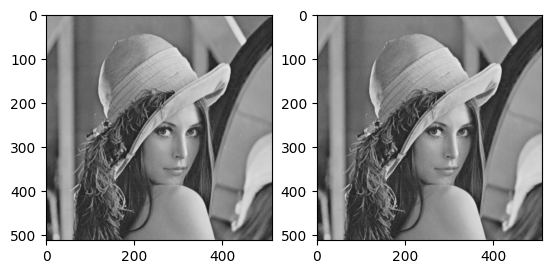

In [5]:
  
img_gray_01 = np.zeros([h,w],img.dtype)                   #创建一张和当前图片大小一样的单通道图片
# 自己写方法，实现灰度
for i in range(h):
    for j in range(w):
        m = img[i,j]                             #取出当前high和wide中的BGR坐标
        img_gray_01[i,j] = int(m[0]*0.11 + m[1]*0.59 + m[2]*0.3)   #将BGR坐标转化为gray坐标并赋值给新图像

    if(i==h-1 and j==w-1):
        print(img_gray_01[i,j])

print (m)
print (img.shape)
print (img_gray_01.shape)
print("image show gray: %s"%img_gray_01)

# cv2.imshow("image show gray",img_gray_01)
# cv2.waitKey(0)

img_gray_01=cv2.cvtColor(img_gray_01,cv2.COLOR_BGR2RGB)
plt.subplot(121)
plt.imshow(img_gray_01)

# 像素值都为0-1的小数也不影响图像显示
img_gray_02 = np.zeros([h,w],img.dtype)   
img_gray_02=img_gray_01/255
print("image show gray: %s"%img_gray_02)
plt.subplot(122)
plt.imshow(img_gray_02)
# plt.show()

---image lenna----
[[[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 ...

 [[ 60  18  84]
  [ 60  18  84]
  [ 58  27  92]
  ...
  [ 84  73 173]
  [ 76  68 172]
  [ 79  62 177]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 62  32  96]
  ...
  [ 79  70 179]
  [ 81  71 181]
  [ 81  74 185]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 62  32  96]
  ...
  [ 79  70 179]
  [ 81  71 181]
  [ 81  74 185]]]


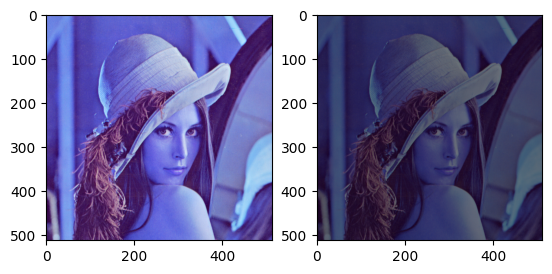

In [6]:
# plt.subplot(221)
# img = plt.imread("lenna.png") 
# img = cv2.imread("lenna.png", False) 
plt.subplot(121)
plt.imshow(img)
print("---image lenna----")
print(img)

# 除以不同的数，得到小数都可以显示图片，应该是保持数值对比就行，但是会影响显示效果
img_02=img/512
plt.subplot(122)
plt.imshow(img_02)


---image gray----
[[162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 ...
 [ 43  43  50 ... 104 100  98]
 [ 44  44  55 ... 104 105 108]
 [ 44  44  55 ... 104 105 108]]


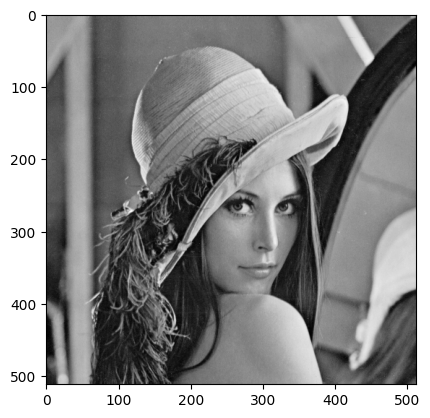

In [7]:
# 灰度化
# 该方法灰度化后像素点值是小于1的浮点数
img_gray = rgb2gray(img)
# 该方法灰度化后像素点值很大，和上面计算方法基本一样，是整数
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# img_gray = img
# plt.subplot(222)
plt.imshow(img_gray, cmap='gray')
print("---image gray----")
print(img_gray)

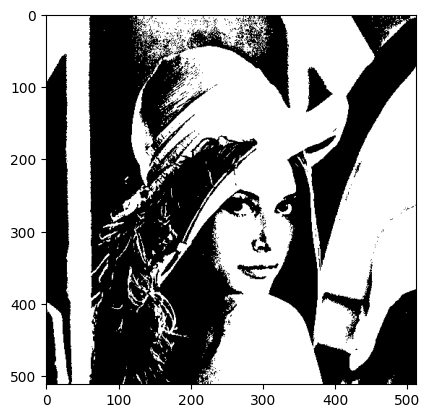

In [8]:
# 二值化
img_binary = np.zeros([h,w],img.dtype) 

# 二值化要基于灰度图像？
rows, cols = img_gray.shape

# 如果大于1，那么除以255转为小数
if(img_gray[0,0]>1):
    img_gray=img_gray/255

for i in range(rows):
    for j in range(cols):
        if (img_gray[i, j] <= 0.5):
            img_binary[i, j] = 0
        else:
            img_binary[i, j] = 1

plt.imshow(img_binary, cmap='gray')

-----imge_binary------
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(512, 512)


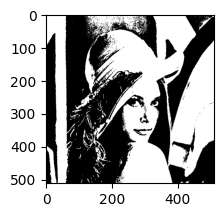

In [9]:
img_binary = np.where(img_gray >= 0.5, 1, 0) 
print("-----imge_binary------")
print(img_binary)
print(img_binary.shape)

plt.subplot(223) 
plt.imshow(img_binary, cmap='gray')
plt.show()

(512, 512, 3)
(100, 100, 3)


True

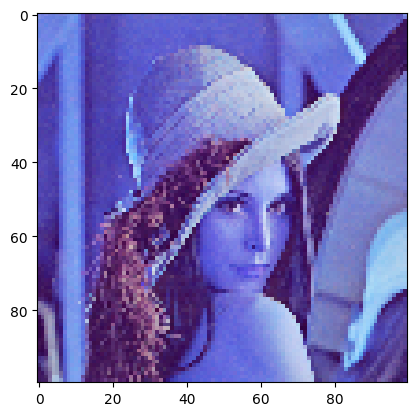

In [10]:
# 缩放
new_h= 50
new_w=50

str_h=input("input new_h:")
str_w=input("input new_w:")

if str_h.isdigit():
    new_h=int(str_h)
if str_w.isdigit():
    new_w=int(str_w)

print(img.shape)

r_h=new_h/h
r_w=new_w/w

height,width,channels =img.shape

img_small = np.zeros((new_h,new_w,channels),img.dtype) 

# 二值化要基于灰度图像？
rows, cols = img_small.shape[:2]

for i in range(rows):
    for j in range(cols):
            x=0
            y=0
            x=int(i/r_h)
            y=int(j/r_w)
            img_small[i, j] = img[x,y]

plt.imshow(img_small)

print(img_small.shape)

cv2.imwrite("lenna_small.png",img_small)

In [11]:
import cv2
import numpy as np
import Util

def function(img):
    height,width,channels =img.shape
    emptyImage=np.zeros((800,800,channels),np.uint8)

    # 比例
    sh=800/height
    sw=800/width

    for i in range(800):
        for j in range(800):
            # x/y为缩放后原图的像素点位置
            x=int(i/sh + 0.5)  #int(),转为整型，使用向下取整。
            y=int(j/sw + 0.5)
            emptyImage[i,j]=img[x,y]

    return emptyImage

In [12]:

def function(img,w,h):
    """
    可以设置缩放后的宽高
    """
    height,width,channels =img.shape
    emptyImage=np.zeros((h,w,channels),np.uint8)

    print(height,width)

    # 比例
    sh=h/height
    sw=w/width

    for i in range(h):
        for j in range(w):
            # x/y为缩放后原图的像素点位置
            # 这里是先高后宽
            x=int(i/sh + 0.5)  #int(),转为整型，使用向下取整。
            y=int(j/sw + 0.5)
            emptyImage[i,j]=img[x,y]

    return emptyImage

512 512
[[[125 137 226]
  [125 137 226]
  [125 137 226]
  ...
  [110 130 221]
  [ 90  99 200]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [125 137 226]
  ...
  [110 130 221]
  [ 90  99 200]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [125 137 226]
  ...
  [110 130 221]
  [ 90  99 200]
  [ 90  99 200]]

 ...

 [[ 57  22  82]
  [ 57  22  82]
  [ 57  22  82]
  ...
  [ 81  71 181]
  [ 81  74 185]
  [ 81  74 185]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 57  22  82]
  ...
  [ 81  71 181]
  [ 81  74 185]
  [ 81  74 185]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 57  22  82]
  ...
  [ 81  71 181]
  [ 81  74 185]
  [ 81  74 185]]]
(1000, 1000, 3)


True

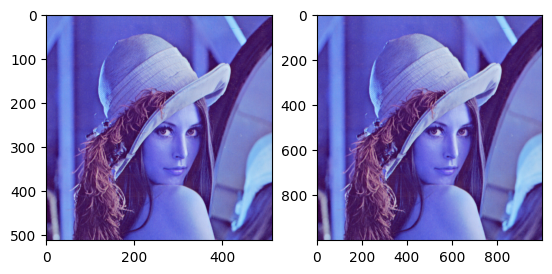

In [14]:
# cv2.resize(img, (800,800,c),near/bin)

imgPath='img/lenna.png'

# cv2不支持中文路径
# img=cv2.imread(imgPath)
img=Util.cv_imread(imgPath)

zoom=function(img,1000,1000)
print(zoom)
print(zoom.shape)
# cv2.imshow("nearest interp",zoom)
# cv2.imshow("image",img)
# cv2.waitKey(0)

import matplotlib.pyplot as plt
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(zoom)

cv2.imwrite("lenna_zoom.png",zoom)
